# NLP with ML

## Social media sentiment analysis on twitter dataset

In [1]:
# Downloaded twitter dataset from kaggle

## Import Dependencies

In [2]:
import pandas as pd #Data analysis
import numpy as np #Mathematical operations
import nltk #NLP toolkit
import re #text search
from textblob import TextBlob #sentiment
import matplotlib.pyplot as plt #visualization
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # Avoid warning messages

In [3]:
# importing dataset
data=pd.read_csv('F:/Datasets/Spam text.csv')

In [4]:
# top 5 rows
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# renaming
data.rename(columns={'Message':'text'},inplace=True)
data

,Category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### EDA

In [6]:
# Checking null values
data.isnull().sum()

Category    0
text        0
dtype: int64

In [7]:
data.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Preprocessing

In [8]:
#  importing common words from nltk
words=set(nltk.corpus.words.words())

In [9]:
lemmatizer=nltk.stem.WordNetLemmatizer() #lemmatizer ensures that the root word belongs to a language
tokenizer=nltk.tokenize.WhitespaceTokenizer() #split a string on whitespace

In [10]:
# convert to lower case ensures uniformality.
data['text']=data['text'].str.lower()
data.head()

,Category,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [11]:
# cleaning text
def clean(text):
    text=re.sub(r'\b[a-zA-Z]\b','',text)          # substitute characters other than A to Z.
    text=re.sub(r'\b[a-zA-Z][a-zA-Z]\b','',text)    # double ckeck
    # tokenize the text if it in common words. 
    text=' '.join(c for c in nltk.wordpunct_tokenize(text) if c in words)
    # lemmatizer used to find out the meaningful root words of the text
    text=' '.join(lemmatizer.lemmatize(w,'v') for w in tokenizer.tokenize(text))
    return text

In [12]:
# applying the equation and creating a dataframe with the cleaned data
df=pd.DataFrame(data.text.apply(lambda x:clean(x)))

In [13]:
# checking it applyed
df

,text
0,until point crazy available only great world b...
1,lar
2,free entry win cup final may text receive entr...
3,dun say early already then say
4,don think go around here though
...,...
5567,this the time have try contact have win the po...
5568,will go esplanade home
5569,pity be mood for that any other
5570,the guy do some but like interest something el...


In [14]:
# we can see that numbers, symbols, etc are removed

In [15]:
# text are ready to further process

## Sentiment Analysis

In [16]:
# polarity is the key to decide sentiment, finding polarity using textblob
df['Polarity']=df.text.apply(lambda x:TextBlob(x).sentiment.polarity)

In [17]:
df

,text,Polarity
0,until point crazy available only great world b...,0.150000
1,lar,0.000000
2,free entry win cup final may text receive entr...,0.400000
3,dun say early already then say,0.100000
4,don think go around here though,0.000000
...,...,...
5567,this the time have try contact have win the po...,0.411111
5568,will go esplanade home,0.000000
5569,pity be mood for that any other,-0.112500
5570,the guy do some but like interest something el...,0.200000


In [18]:
# any polarity >=0 considered sentiment as positive, others are negative
df['Sentiment']=np.where(df['Polarity']>=0,'Postive','Negative')
df

,text,Polarity,Sentiment
0,until point crazy available only great world b...,0.150000,Postive
1,lar,0.000000,Postive
2,free entry win cup final may text receive entr...,0.400000,Postive
3,dun say early already then say,0.100000,Postive
4,don think go around here though,0.000000,Postive
...,...,...,...
5567,this the time have try contact have win the po...,0.411111,Postive
5568,will go esplanade home,0.000000,Postive
5569,pity be mood for that any other,-0.112500,Negative
5570,the guy do some but like interest something el...,0.200000,Postive


<Axes: ylabel='Sentiment'>

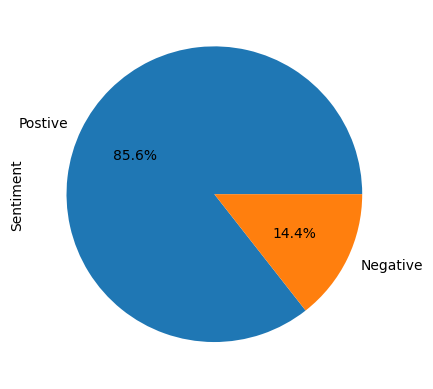

In [19]:
# creating a pie chart to check the quantity of positive sentiment
df.Sentiment.value_counts().plot.pie(autopct="%.1f%%")

<Axes: xlabel='Sentiment', ylabel='count'>

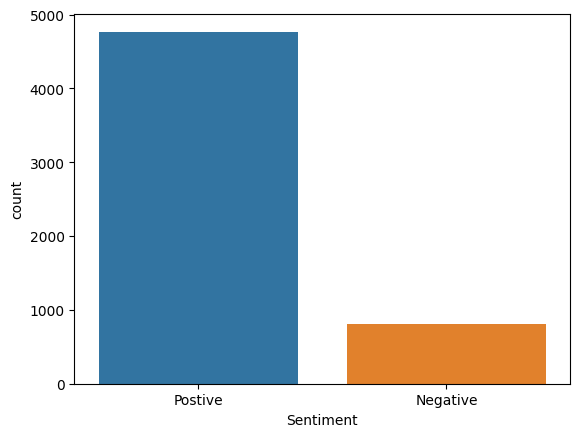

In [20]:
sns.countplot(x='Sentiment',data=df)

### Mostly tweets are positive

## Prediction

In [21]:
df.columns

Index(['text', 'Polarity', 'Sentiment'], dtype='object')

In [22]:
y=df['Sentiment']
y.value_counts()

Postive     4769
Negative     803
Name: Sentiment, dtype: int64

In [23]:
# dataset is not balanced, maybe some ML alg face some issue if we don't balance it.
#using over sampling(minority class of data points is incresed in order to balance the dataset and improve the performance of a predictive model.)
# if we reduce sample size it lead the algorithm to overfit.
import imblearn # Imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
rus=RandomOverSampler(sampling_strategy=1)
X_rus,y_rus=rus.fit_resample(df.drop('Sentiment', axis=1), df['Sentiment'])
df= pd.concat([pd.DataFrame(y_rus), pd.DataFrame(X_rus)], axis=1)
df.head()

,Sentiment,text,Polarity
0,Postive,until point crazy available only great world b...,0.15
1,Postive,lar,0.00
2,Postive,free entry win cup final may text receive entr...,0.40
3,Postive,dun say early already then say,0.10
4,Postive,don think go around here though,0.00


In [24]:
y=df['Sentiment']
y.value_counts()

Postive     4769
Negative    4769
Name: Sentiment, dtype: int64

In [25]:
# we have to change the string to number by encode the column
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [26]:
# term frequency - inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(stop_words='english') # removing stopwords(common and meaningless words)
x=vec.fit_transform(df.text).toarray() # apply equation on text and convert to array
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

### Models

In [28]:
# Algorithms
from sklearn.linear_model import LogisticRegression # classification 
from sklearn.ensemble import RandomForestClassifier #ensemble construct strong model
from sklearn.svm import SVC # split data based on hyperplane
from sklearn.naive_bayes import BernoulliNB # probablistic classifier
from sklearn.neighbors import KNeighborsClassifier # nearest datapoints

In [29]:
# Models
lr=LogisticRegression()
rf=RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=10,criterion='gini',random_state=42) # reducing error by averaging 100 trees
nb=BernoulliNB()
svc=SVC(kernel="rbf",random_state=42) 
knn=KNeighborsClassifier(n_neighbors=5) # 5 neighbor datapoints
# listing all models
models=[lr,rf,nb,svc,knn]

# Evaluation

In [30]:
from sklearn.metrics import accuracy_score,classification_report # Evaluation metrics

In [31]:
for model in models:
    model.fit(x_train,y_train)
    test_pred=model.predict(x_test)
    train_pred=model.predict(x_train)
    print(model.__class__.__name__)
    print(' Train Accuracy :',accuracy_score(y_train,train_pred))
    print(' Test Accuracy :',accuracy_score(y_test,test_pred))
    print(' Classification Report :',classification_report(y_test,test_pred))

LogisticRegression
 Train Accuracy : 0.9598562013181546
 Test Accuracy : 0.9304682040531097
 Classification Report :               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1418
           1       0.92      0.94      0.93      1444

    accuracy                           0.93      2862
   macro avg       0.93      0.93      0.93      2862
weighted avg       0.93      0.93      0.93      2862

RandomForestClassifier
 Train Accuracy : 0.8374775314559616
 Test Accuracy : 0.8137665967854647
 Classification Report :               precision    recall  f1-score   support

           0       0.90      0.70      0.79      1418
           1       0.76      0.92      0.83      1444

    accuracy                           0.81      2862
   macro avg       0.83      0.81      0.81      2862
weighted avg       0.83      0.81      0.81      2862

BernoulliNB
 Train Accuracy : 0.9108747753145596
 Test Accuracy : 0.8791055206149546
 Classification Report 

### It appears 'Support Vector Machine' model performs well with '98% ACCURACY'.

# Finished